In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Load the image
image_path = 'test_images/fire_image1.jpg'  # Change this to your image path
image = cv2.imread(image_path)

In [8]:
# Convert BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
# Step 1: Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [10]:
# Step 2: Define fire-like color range in HSV
lower_fire = np.array([0, 50, 50])  # Adjust these values for your image
upper_fire = np.array([50, 255, 255])

In [11]:
fire_mask = cv2.inRange(hsv_image, lower_fire, upper_fire)

In [12]:
fire_segment = cv2.bitwise_and(image, image, mask=fire_mask)

In [13]:
# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fire_segment_rgb = cv2.cvtColor(fire_segment, cv2.COLOR_BGR2RGB)

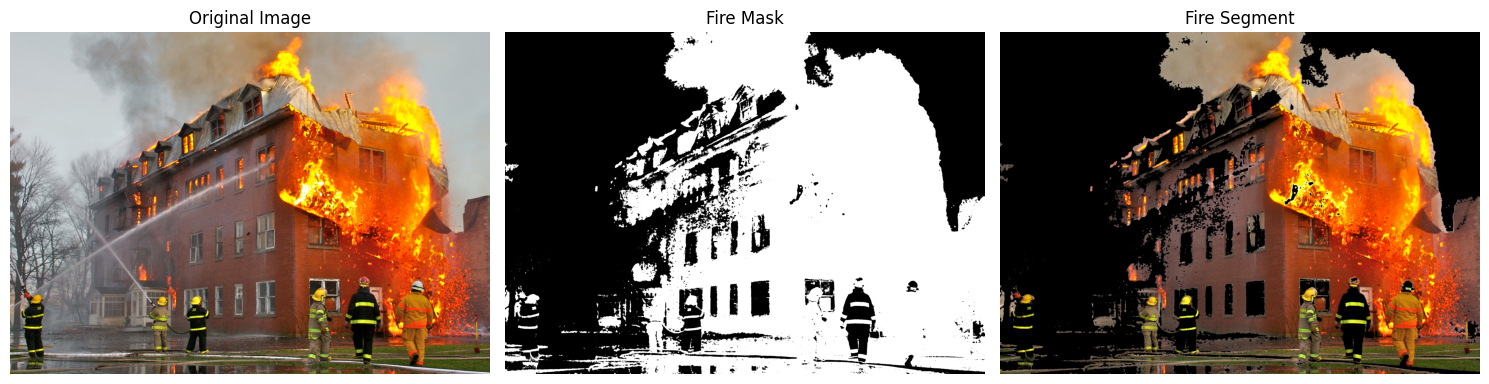

In [14]:
# Step 5: Plot the original image, fire mask, and result using matplotlib
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot fire mask (in grayscale)
plt.subplot(1, 3, 2)
plt.imshow(fire_mask, cmap='gray')
plt.title('Fire Mask')
plt.axis('off')

# Plot fire-segmented image
plt.subplot(1, 3, 3)
plt.imshow(fire_segment_rgb)
plt.title('Fire Segment')
plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
def classify_fire_combined(fire_mask, fire_threshold=0.01, min_fire_area=1000):
    """
    Classify whether fire is present using both pixel percentage and fire region area.
    
    Parameters:
    - fire_mask: np.array, binary mask where fire regions are white (255)
    - fire_threshold: float, the percentage threshold for pixel-based fire detection
    - min_fire_area: int, the minimum total area of fire regions for area-based fire detection
    
    Returns:
    - bool: True if fire is detected by either method, False otherwise
    """
    
    # Fire pixel percentage check
    fire_pixel_count = np.count_nonzero(fire_mask)
    total_pixel_count = fire_mask.size
    fire_percentage = fire_pixel_count / total_pixel_count
    
    # Fire area check
    contours, _ = cv2.findContours(fire_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_fire_area = sum(cv2.contourArea(contour) for contour in contours)
    
    # Fire detected if either condition is true
    if fire_percentage >= fire_threshold or total_fire_area >= min_fire_area:
        return True
    else:
        return False


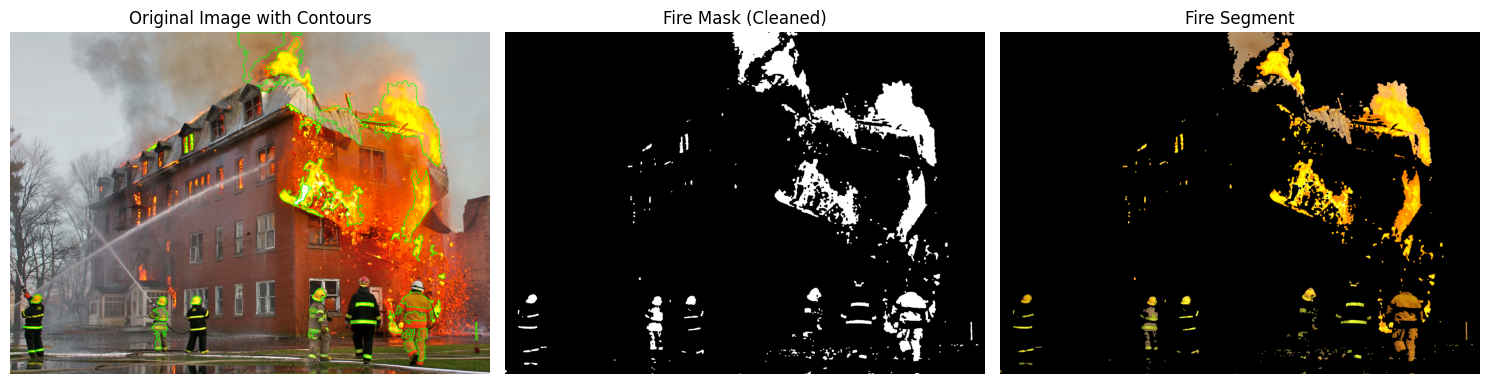

Fire detected!


In [16]:
def detect_fire(image_path, lower_fire=np.array([15, 100, 100]), upper_fire=np.array([35, 255, 255])):
    """
    Detects fire in the given image using HSV color thresholding and morphological operations.
    
    Parameters:
    - image_path: str, path to the image file
    - lower_fire: np.array, lower HSV threshold for fire-like colors
    - upper_fire: np.array, upper HSV threshold for fire-like colors
    
    Returns:
    - None (displays images inline)
    """
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    
    # Step 1: Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Step 2: Create a mask based on the color range
    fire_mask = cv2.inRange(hsv_image, lower_fire, upper_fire)

    # Step 3: Perform morphological operations to clean the mask
    kernel = np.ones((5, 5), np.uint8)
    fire_mask_cleaned = cv2.morphologyEx(fire_mask, cv2.MORPH_OPEN, kernel)
    fire_mask_cleaned = cv2.morphologyEx(fire_mask_cleaned, cv2.MORPH_CLOSE, kernel)

    # Step 4: Apply the mask to the original image
    fire_segment = cv2.bitwise_and(image, image, mask=fire_mask_cleaned)

    # Optional: Detect and draw contours around the fire regions
    contours, _ = cv2.findContours(fire_mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter by contour area to avoid small false positives
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Draw green contours

    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fire_segment_rgb = cv2.cvtColor(fire_segment, cv2.COLOR_BGR2RGB)
    fire_present_combined = classify_fire_combined(fire_mask_cleaned, fire_threshold=0.01, min_fire_area=1000)



    # Step 5: Plot the original image, fire mask, and result using matplotlib
    plt.figure(figsize=(15, 5))

    # Plot original image with contours
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image with Contours')
    plt.axis('off')

    # Plot fire mask (in grayscale)
    plt.subplot(1, 3, 2)
    plt.imshow(fire_mask_cleaned, cmap='gray')
    plt.title('Fire Mask (Cleaned)')
    plt.axis('off')

    # Plot fire-segmented image
    plt.subplot(1, 3, 3)
    plt.imshow(fire_segment_rgb)
    plt.title('Fire Segment')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    if fire_present_combined:
        print("Fire detected!")
    else:
        print("No fire detected...")

# Example Usage
image_path = 'test_images/fire_image1.jpg'
detect_fire(image_path)

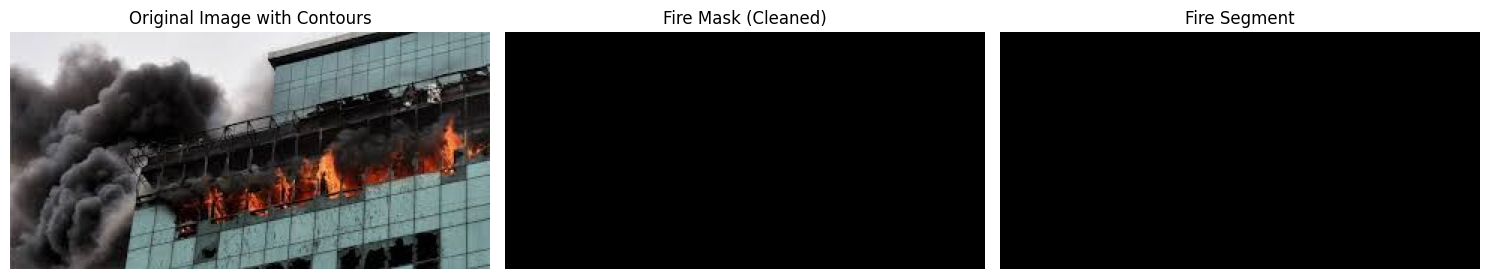

No fire detected...


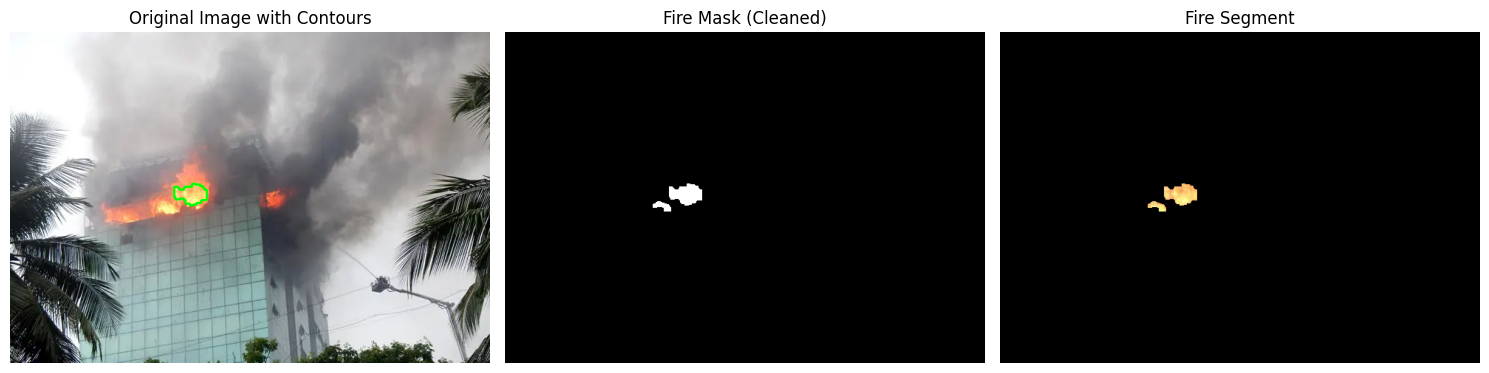

Fire detected!


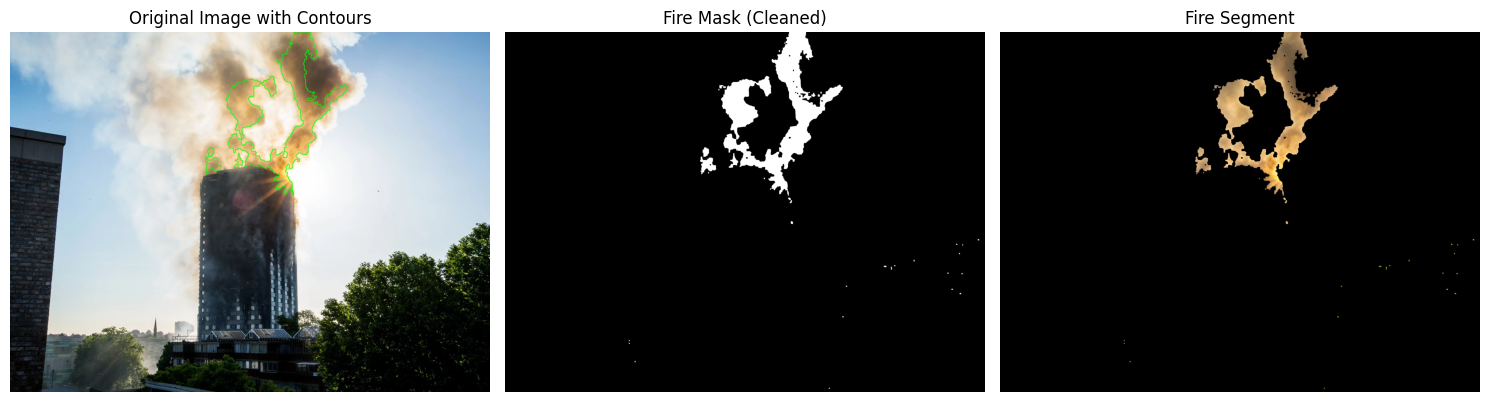

Fire detected!


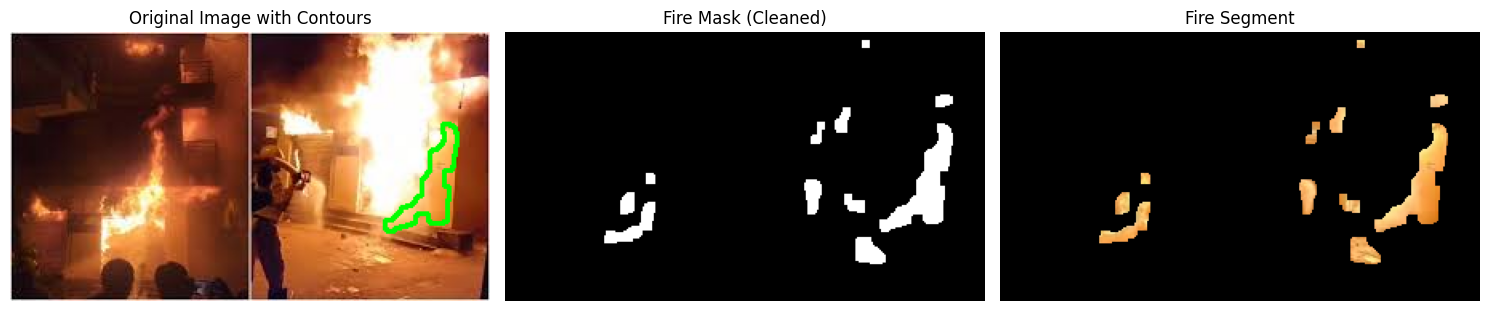

Fire detected!


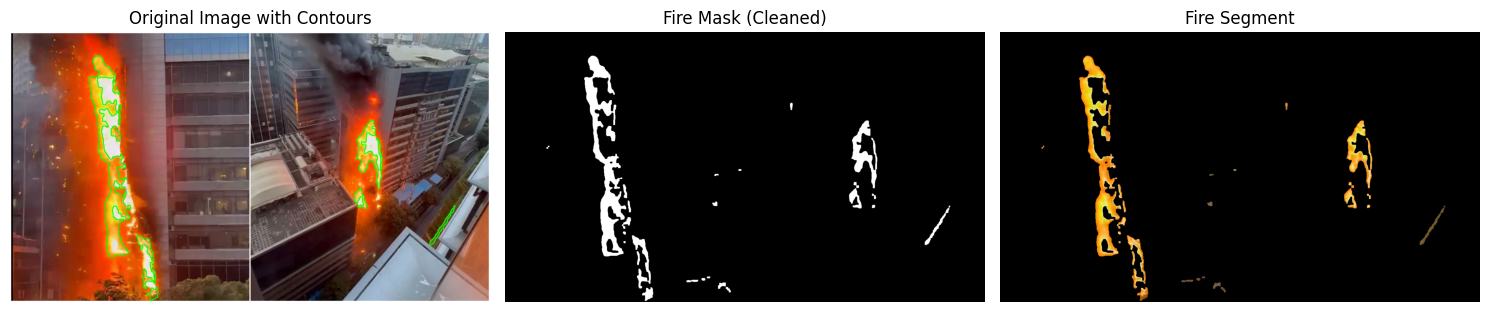

Fire detected!


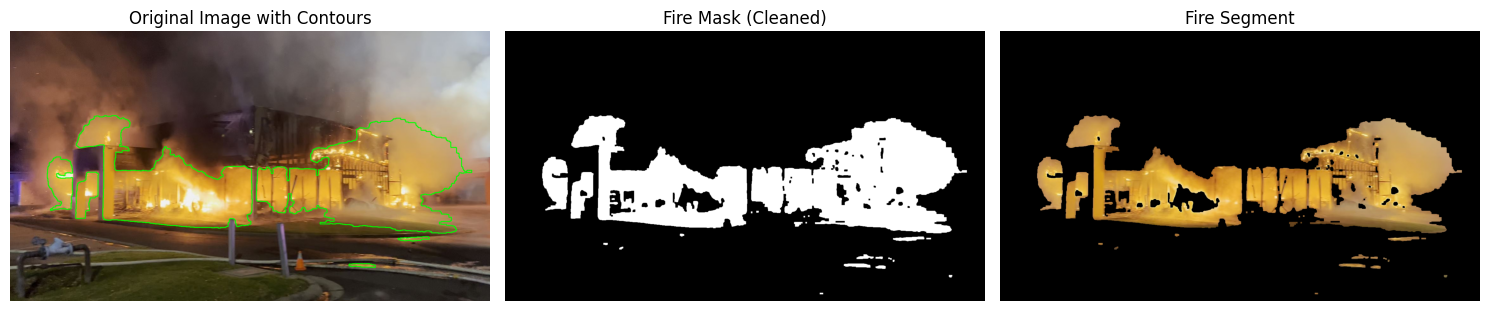

Fire detected!


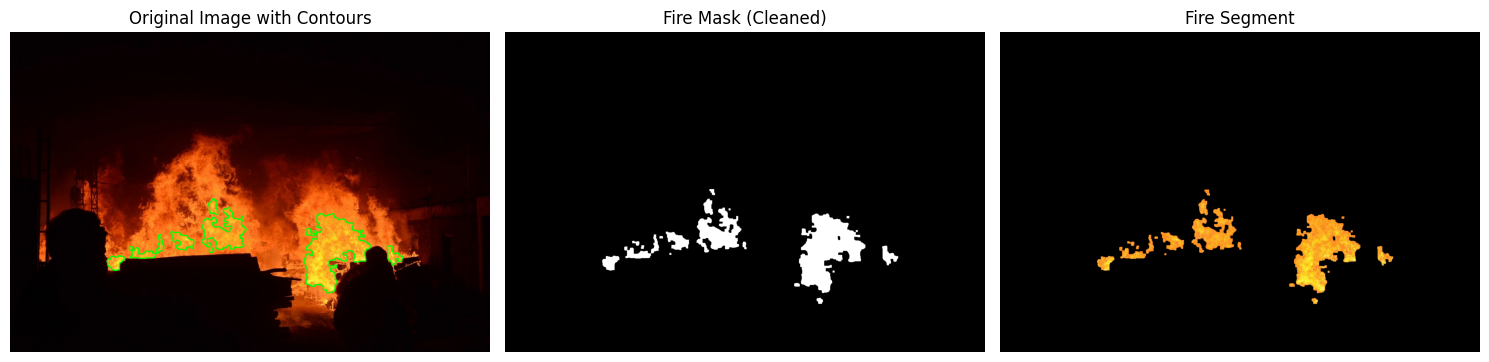

Fire detected!


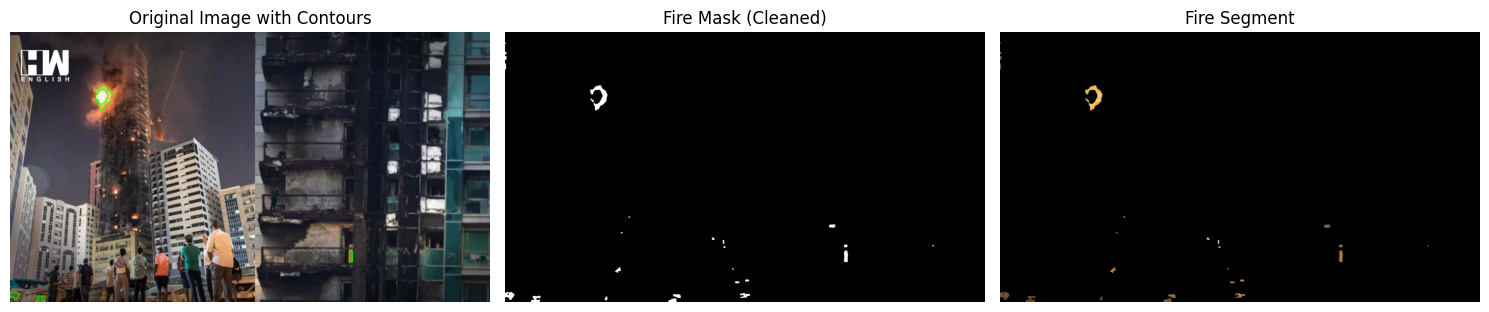

Fire detected!


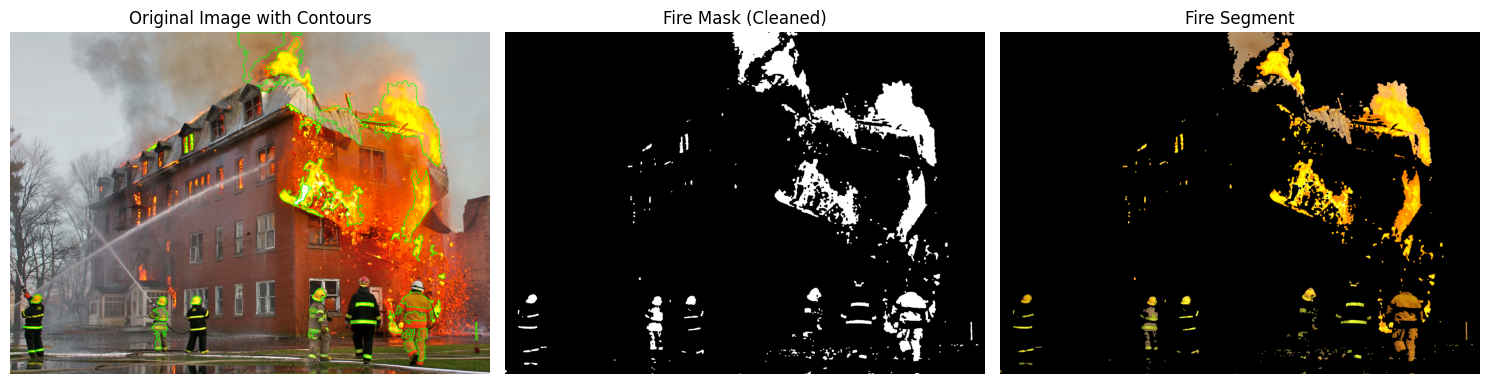

Fire detected!


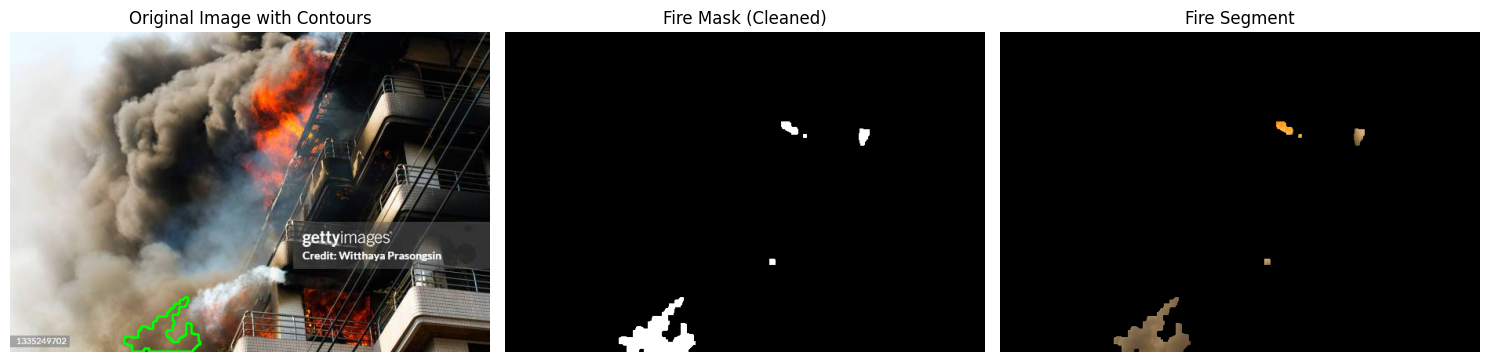

Fire detected!


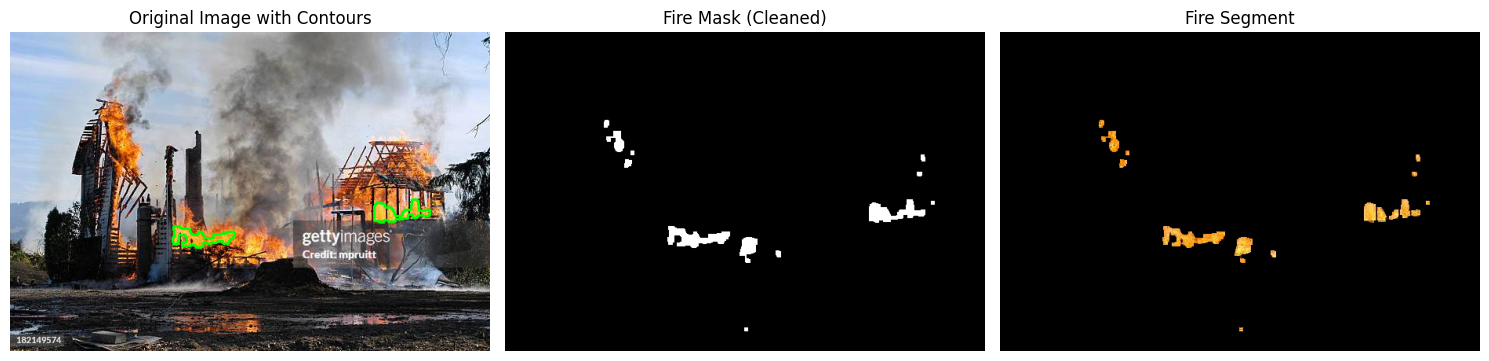

Fire detected!


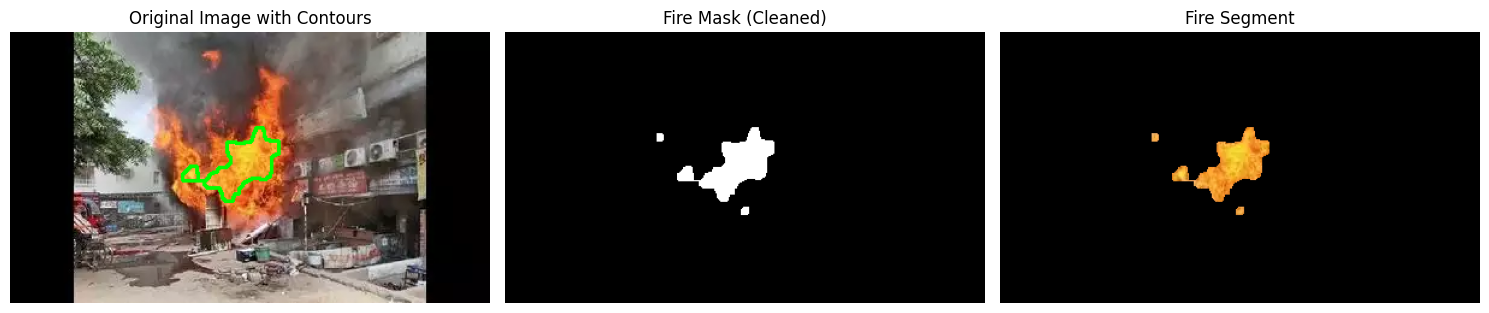

Fire detected!


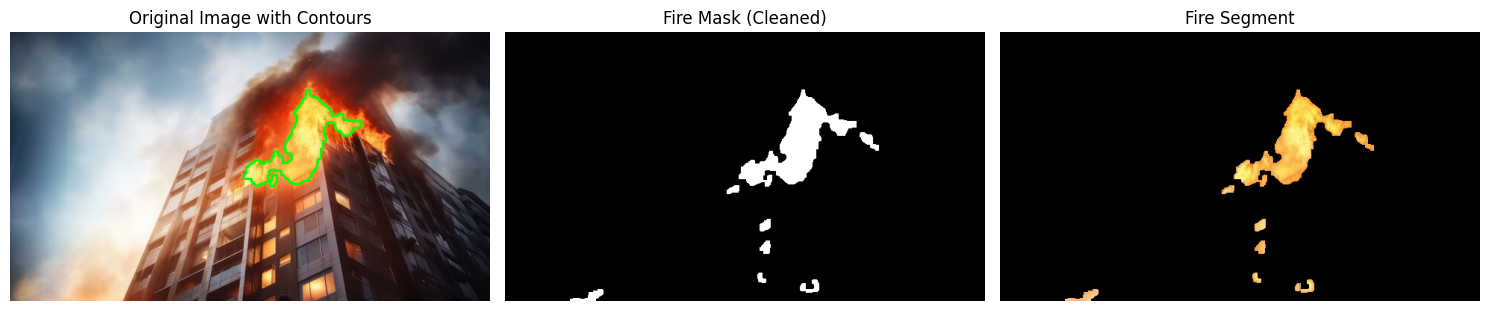

Fire detected!


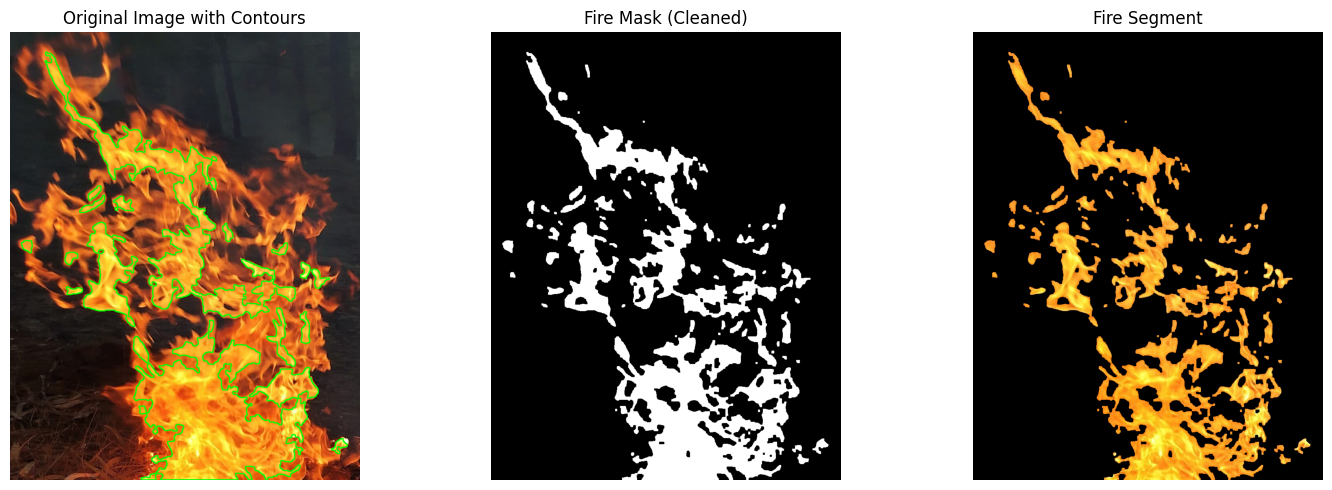

Fire detected!


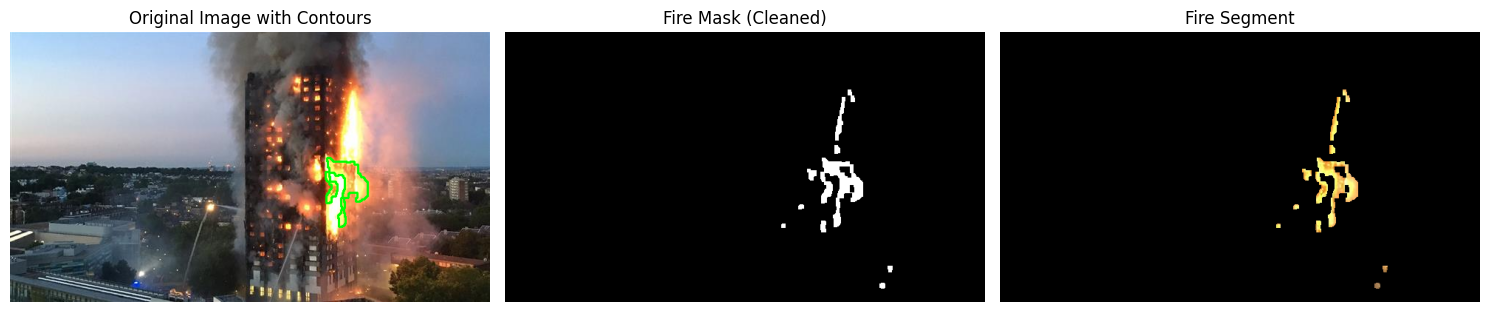

Fire detected!


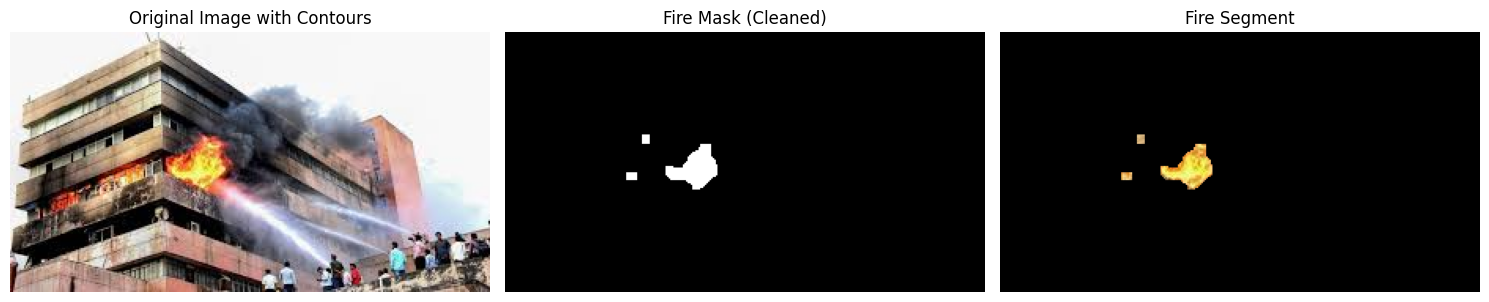

Fire detected!


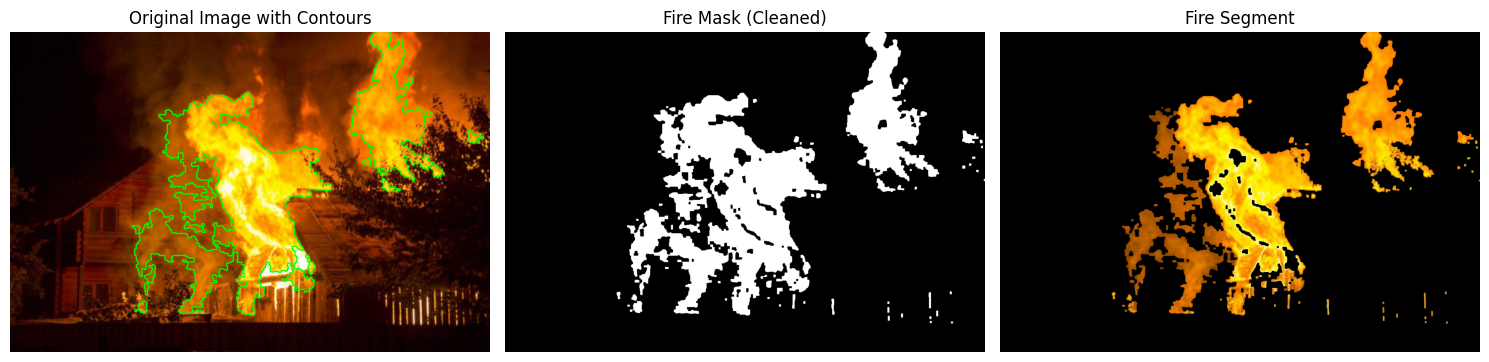

Fire detected!


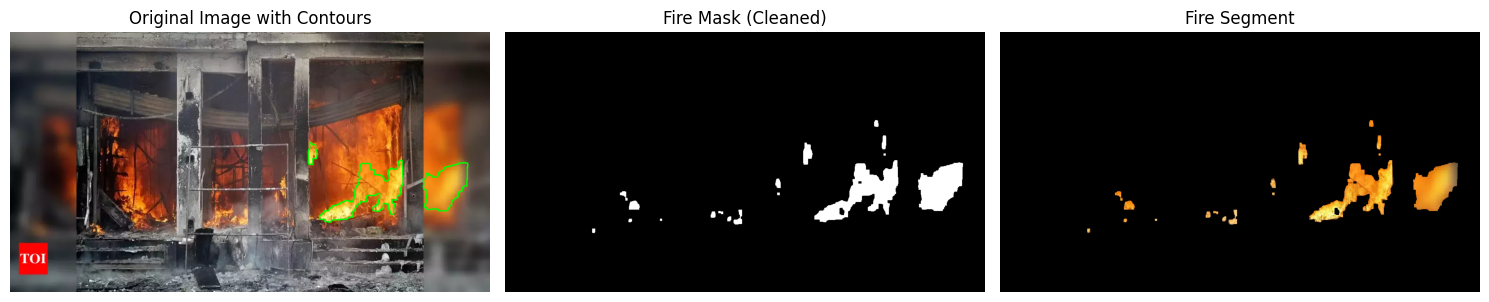

Fire detected!


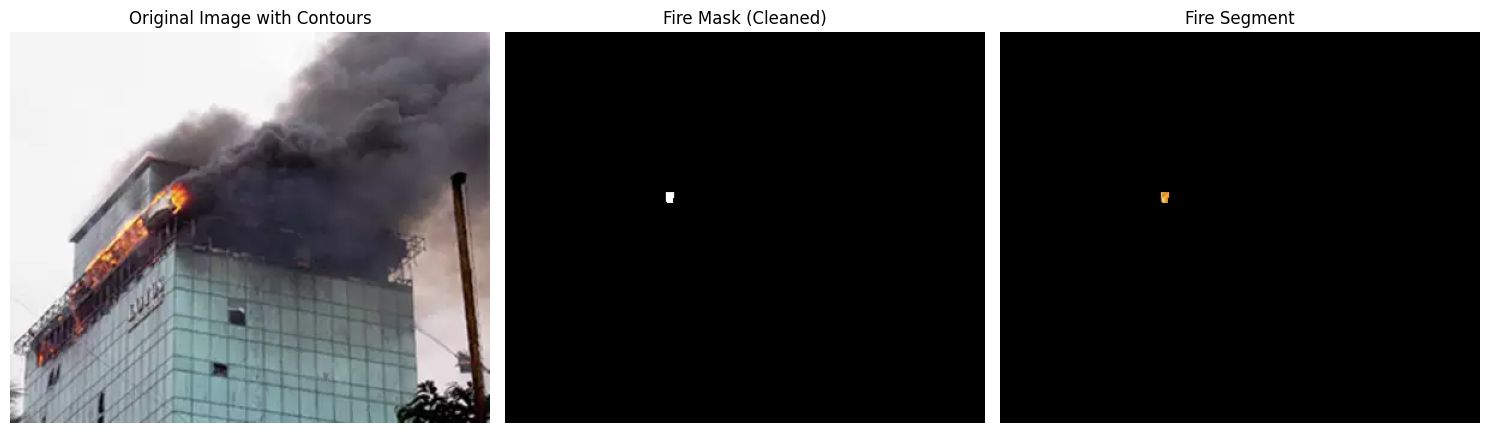

No fire detected...


In [17]:
import os

def detect_fire_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.webp') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            detect_fire(image_path)

# Replace 'test_images' with the actual folder path
folder_path = 'test_images'
detect_fire_in_folder(folder_path)